### **Trabajo Práctico 1. Aplicaciones Computacionales en Negocios**
**Materia:** Aplicaciones Computacionales en Negocios  

**Universidad Torcuato Di Tella**  

**Integrantes:** Kiara Martínez, Colette Taie, Martina Mariño, Paula Ho y Josefina Casas Pardo 

**Fecha:** 22/09/25

---

### Introducción

El objetivo de este trabajo es modelar y simular el comportamiento de aviones que arriban al Aeroparque Jorge Newbery (AEP), considerando condiciones estocásticas de congestión y clima.  
Se implementa un modelo de **simulación Monte Carlo** que permite estudiar métricas de operación bajo distintos escenarios:

- Congestión en pista por alta demanda.  
- Condiciones de viento que obligan a frustrar aterrizajes.  
- Tormentas que cierran el aeropuerto de forma inesperada.  

El análisis busca cuantificar atrasos, congestión y desvíos a Montevideo, y evaluar cómo estas métricas dependen de la tasa de arribo ($\lambda$).

### **Preguntas exploratorias**

**¿Cuántos aviones aterrizan en AEP entre las 6am y la medianoche?**

Partimos de la información de que en promedio arriban **350 vuelos por día** al Aeroparque Jorge Newbery (AEP).  

Como un día completo tiene 24 horas, eso equivale a aproximadamente:

$$ \frac{350}{24} \approx 14.6 \ \text {vuelos/hora} $$

Entre las 6 am y la medianoche transcurren 18 horas, por lo que estimamos:

$$ 14.6 \times 18 \approx 263 \ \text {vuelos} $$

*Respuesta final:* Alrededor de **263 aviones** aterrizan en AEP en ese rango horario.

---

**¿Cuánto es una milla náutica en kilómetros? ¿Y un nudo en kilómetros por hora?**

Las equivalencias son:

$$ 1 \ \text{milla náutica (mn)} = 1.852 \ \text{km} $$
$$ 1 \ \text{nudo (k)} = 1.852 \ \text{km/h} $$

---

**¿Cuánto tardaría un avión en llegar desde las 100 mn hasta AEP? Y si la velocidad a más de 100 mn fuera 500 nudos, ¿cuánto tardaría en llegar desde Rosario a AEP? Estos órdenes de magnitud, ¿tienen sentido con lo que se puede consultar en Aerolíneas Argentinas?**

##### **Aproximación desde 100 mn a AEP**

Distancia total: 

$$ 100 \ \text{mn} = 185.2 \ \text{km} $$

Dividimos en tramos según la tabla de distancias y velocidades:

1. 100-50 mn (50 mn = 92.6 km)
   
   Velocidad promedio: $$ \frac{300+250}{2} = 275 \ \text{nudos} = 509.3 \ \text{km/h} $$

   $$ t_1 = \frac{92.6}{509.3} = 0.18 \ \text{h} \approx 10.9 \ \text{min} $$

2. 50- 15 mn (35 mn = 64.8 km)
   
   Velocidad promedio: $$ \frac{250 + 200}{2} = 225 \ \text{nudos} = 416.7 \ \text{km/h} $$

   $$ t_2 = \frac{64.8}{416.7} = 0.15 \ \text{h} \approx 9.3 \ \text{min} $$

3. 15-5 mn (10 mn = 18.5 km)

   Velocidad promedio: $$ \frac{200 + 150}{2} = 175 \ \text{nudos} = 324.1 \ \text{km/h} $$

   $$ t_3 = \frac{18.5}{324.1} = 0.057 \ \text{h} \approx 3.4 \ \text{min} $$

4. 5-0 mn (5 mn = 9.3 km)

   Velocidad promedio: $$ \frac{150 + 120}{2} = 135 \ \text{nudos} = 250.02 \ \text{km/h} $$

   $$ t_4 = \frac{9.3}{250.02} = 0.037 \ \text{h} \approx 2.2 \ \text{min} $$

Tiempo total de aproximación:

$$ T = t_1 + t_2 + t_3 + t_4 \approx 26 \ \text{minutos} $$

##### **Distancia aproximada de Rosario a AEP:**

$$ 293.6 \ \text{km} $$

Calculamos cuántos km viaja a 500 nudos:

$$ 100\ \text{mn}= 185.2\ \text{km} ⇒ 293.6 - 185.2 = 108.4\ \text{km} $$

Averiguamos cuántos minutos viaja en ese tramo:

$$ 500 \ \text{nudos} = 926 \ \text{km/h} ⇒ T = \frac{108.4}{926} \approx 0.12 \ \text{h} \approx 7.02 \ \text{minutos} $$

Y luego, al entrar al radar, calculamos los minutos para cada tramo (yendo a la velocidad máxima de cada rango):

$$ Primer\ tramo: 50\ \text{mn}= 92.6\ \text{km}\ y \ 300 \ \text{nudos} = 555.6 \ \text{km/h} ⇒ T = \frac{92.6}{555.6} \approx 0.16 \ \text{h} \approx 10 \ \text{minutos} $$

$$ Segundo\ tramo:35\ \text{mn}= 64.82\ \text{km}\ y \ 250 \ \text{nudos} = 463 \ \text{km/h} ⇒ T = \frac{64.82}{463} \approx 0.14 \ \text{h} \approx 8.4 \ \text{minutos} $$



---

**¿Cuál es la cantidad máxima de aterrizajes que podrían suceder en teoría en AEP por entre las 6am y la medianoche?**

En ese rango horario hay:

$$ 18 \ \text{horas} = 1080 \ \text{minutos} $$

Si la separación mínima es de 4 minutos:

$$ \frac{1080}{4} = 270 \ \text{aterrizajes máximos} $$

*Respuesta final:* Como máximo, podrían aterrizar **270 aviones** entre las 6am y la medianoche.

### **Parte 1 – Simulación básica de Monte Carlo y visualización**  

En esta primera parte implementamos la simulación de la fila de aviones.  
El modelo considera:

- Aviones que aparecen en el radar a 100 millas náuticas (mn).  
- Aproximación con velocidades máximas según tramo.  
- Regla de separación mínima de 4 minutos.  
- Ajustes de velocidad o desvíos a Montevideo en caso de congestión.  

Para visualizarlo, generamos una animación estilo radar futurista, con los aviones aproximándose a AEP.

In [2]:
from IPython.display import HTML
from simulacion import simular_con_historia
#from graficos import animar_fila_radar

# Simulación 
sim_data = simular_con_historia(lambda_por_min = 0.2, minutos = 200, seed = 42)

# Visualización
#anim = animar_fila_radar(sim_data["historia"], 200, 30)
#HTML(anim.to_jshtml())

### **Parte 2 – Relación entre tasa de arribo y $\lambda$**


Si el promedio es de **1 avión por hora**, y hay 60 minutos en una hora, entonces:  

$$ \lambda = \frac{1}{60} \approx 0.0167 $$

Este valor representa la probabilidad de que aparezca un avión en un minuto dado. 

### **Parte 3 – Probabilidad de 5 aviones en una hora**

Con $\lambda$ = 1/60, el número de arribos en una hora sigue una **distribución de Poisson** con media 1.  

Analizamos la probabilidad de que arriben exactamente 5 aviones en una hora por dos métodos: 
  
- **Simulación Monte Carlo:** función `estimar_prob_5`, que corre múltiples simulaciones de 60 minutos.  
- **Cálculo teórico:** distribución de Poisson con parámetro $\mu = 1$.

In [3]:
import numpy as np
from simulacion import run_simulacion

def estimar_prob_5(n_sim = 200_000, seed = 42):
    np.random.seed(seed)
    cuenta_5 = 0
    
    for i in range(n_sim):
        aviones = run_simulacion(lambda_por_min = 1/60, minutos = 60, seed = seed + i)
        if len(aviones) == 5:
            cuenta_5 += 1
    
    # Estimación Monte Carlo de P(N=5)
    p_hat = cuenta_5 / n_sim
    se = np.sqrt(p_hat * (1 - p_hat) / n_sim) # error estándar
    ic = (p_hat - 1.96 * se, p_hat + 1.96 * se) # IC 95%
    return p_hat, se, ic

p_hat, se, ic = estimar_prob_5(n_sim = 200_000, seed = 42)

print(f"Probabilidad estimada (Monte Carlo): {p_hat:.5f}")
print(f"Error estándar: {se:.5f}")
print(f"IC 95%: ({ic[0]:.5f}, {ic[1]:.5f})")

Probabilidad estimada (Monte Carlo): 0.00286
Error estándar: 0.00012
IC 95%: (0.00263, 0.00309)


Con la simulación de Monte Carlo el resultado fue:

- Probabilidad estimada: **0.00286**
- Error estándar: **0.00012**
- IC 95%: (0.00263, 0.00309)

De manera analítica, la probabilidad de que lleguen exactamente 5 aviones es:

$$ P(N=5) = \frac{e^{-1}\cdot 1^5}{5!} \approx 0.00307 $$

*Respuesta final:* la probabilidad de que lleguen 5 aviones en una hora es $\; \approx 0.3\%$, valor que coincide con la estimación obtenida por Monte Carlo.

---

¿Por qué usamos Poisson y no Binomial?

En rigor, si dividimos la hora en 60 intervalos de un minuto, con probabilidad $p=\lambda=1/60$ de arribo en cada minuto, el número de aviones en una hora sigue una distribución Binomial(60, 1/60).

Sin embargo, para procesos de llegadas raras e independientes, cuando el número de intervalos $n$ es grande y $p$ es pequeño de modo que $ np=\lambda t $ se mantiene constante, la Binomial se aproxima muy bien a una Poisson( $\mu=\lambda t $).
En este caso, $n=60$ y $ p=1/60 $ hacen que $\mu = 1$, por lo que la distribución de arribos puede modelarse directamente con una Poisson(1). Esto simplifica el cálculo y refleja de forma más natural la naturaleza del proceso de arribos (un proceso de Poisson en tiempo continuo).

### **Parte 4 – Congestión según $\lambda$**

Analizamos el impacto de distintos valores de $\lambda$:  

$$ \{0.02, 0.1, 0.2, 0.5, 1.0\} $$

Para cada escenario medimos:  
- **Frecuencia de congestión** (aviones volando más lento que lo permitido).  
- **Atraso promedio** respecto al tiempo ideal.  
- **Desvíos a Montevideo**.  

Usamos `correr_experimentos` para obtener resultados con error de estimación.

In [4]:
from analisis import MetricasSimulacion, print_resumen
from experimentos import correr_experimentos

lambdas = [0.02, 0.1, 0.2, 0.5, 1]
metricas_lambdas = {lam: MetricasSimulacion() for lam in lambdas}

df = correr_experimentos(lambdas, n_rep = 150, metricas_lambda = metricas_lambdas, seed = 2025)
print_resumen(metricas_lambdas)



Lambda     Aterrizajes  Aviones    En vuelo        Reinserciones      Desv. MVD       Desv. Viento    Desv. Tormenta 
---------------------------------------------------------------------------------------------------------
0.02       3227         3302       75              485                0               0               0              
0.1        15420        16335      503             15480              412             0               0              
0.2        19180        32638      1048            54032              12410           0               0              
0.5        19106        81079      1344            80389              60629           0               0              
1          17700        162000     1350            36000              142950          0               0              


**Observaciones:**

- **Aterrizajes:** Para valores bajos de $\lambda$, la mayoría de los aviones logran aterrizar. A medida que $\lambda$ aumenta, la proporción de aterrizajes respecto al total de aviones disminuye, evidenciando saturación del sistema.

- **Aviones en vuelo:** El número de aviones que quedan en vuelo al final de la simulación crece con $\lambda$, reflejando congestión y acumulación en el espacio aéreo.

- **Reinserciones:** Las reinserciones aumentan fuertemente con $\lambda$, lo que indica que muchos aviones deben esperar o realizar maniobras para mantener la separación mínima.

- **Desvíos a Montevideo:** Para $\lambda$ bajos, los desvíos son nulos, pero a partir de $\lambda = 0.2$ se incrementan rápidamente, llegando a valores extremos en $\lambda = 1.0$. Esto muestra que el aeropuerto no puede absorber tanta demanda y muchos vuelos deben ser redirigidos.


##### **Análisis de aviones de aterrizaron**

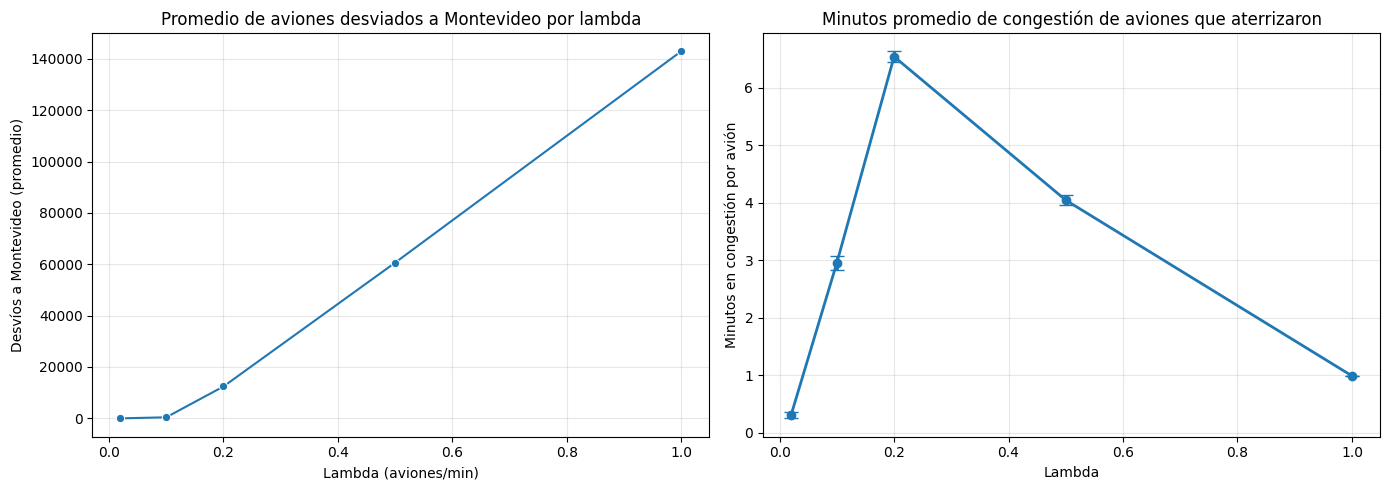

Lambda     Promedio   Std        N          Error MC        IC95_lower      IC95_upper     
-------------------------------------------------------------------------------------
0.02       0.31       0.36       150        0.0291          0.2525          0.3665         
0.10       2.96       0.76       150        0.0618          2.8390          3.0812         
0.20       6.55       0.59       150        0.0483          6.4506          6.6398         
0.50       4.05       0.56       150        0.0456          3.9587          4.1375         
1.00       0.99       0.00       150        0.0000          0.9915          0.9915         


In [5]:
from graficos import plot_desvios_y_congestion
from analisis import IC_globales

plot_desvios_y_congestion(metricas_lambdas,df)
res = IC_globales(df)

- La congestión promedio crece rápidamente a medida que aumenta $\lambda$ desde valores bajos, alcanzando un máximo en $\lambda = 0.20$.
- Para valores altos de $\lambda$ (0.5 y 1.0), la congestión promedio disminuye. Esto se debe a que, en escenarios de alta congestión, muchos aviones son desviados y no se incluyen en el cálculo de congestión de los aterrizados.

*Este comportamiento resalta la importancia de considerar los desvíos en el análisis, ya que la congestión promedio puede dar una impresión engañosa si solo se calcula sobre los aviones que logran aterrizar.*

**Detalle de congestión por cada tramo de velocidad**

Lambda     Freq. Cong. IC Low     IC Up      Max Cong.  IC Low     IC Up      Lejos      Medio      Cerca     
----------------------------------------------------------------------------------------------------
0.02       0.006      0.005      0.007      0.7        0.6        0.8        0.3        0.0        0.0       
0.10       0.239      0.229      0.250      2.6        2.6        2.7        2.8        0.2        0.0       
0.20       0.803      0.796      0.810      3.9        3.9        4.0        6.4        0.1        0.0       
0.50       0.989      0.988      0.990      4.1        4.1        4.2        4.0        0.0        0.0       
1.00       0.999      0.999      0.999      3.0        3.0        3.0        1.0        0.0        0.0       
----------------------------------------------------------------------------------------------------
Lejos, Medio y Cerca son minutos promedio de congestión por tramo (>50MN, 15-50MN, <15MN).


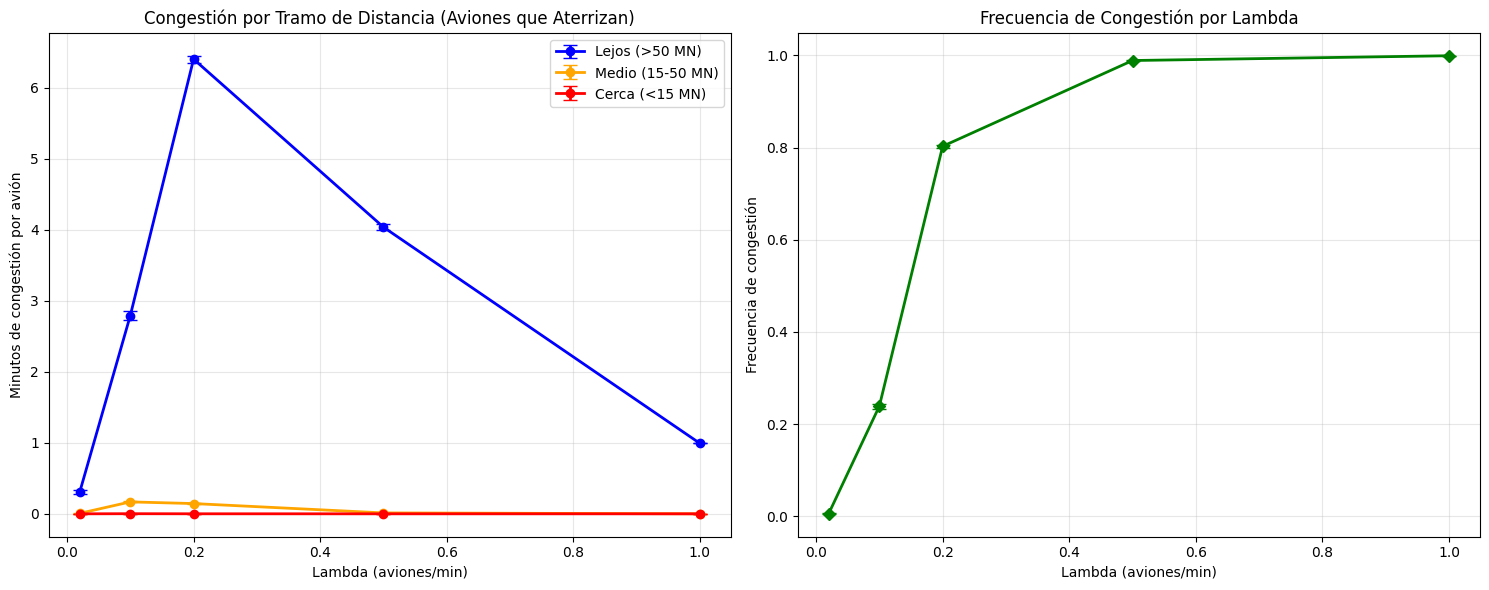

In [6]:
from analisis import print_resumen_congestion
from graficos import plot_congestion_por_lambda

print_resumen_congestion(df)
plot_congestion_por_lambda(df)

- La **frecuencia de congestión** aumenta fuertemente con $\lambda$, pasando de casi nula en $\lambda = 0.02$ a prácticamente segura en $\lambda = 1.0$. Es decir, a mayor lambda más seguridad de que hay aviones atravezando congestión en cada minuto.
- La congestión se concentra principalmente en los tramos **lejanos** a AEP ("Lejos"), mientras que en los tramos **medios** y **cercanos** la congestión es prácticamente inexistente.
- Esto refleja que los aviones sufren demoras y reducción de velocidad principalmente al inicio de la aproximación, cuando la acumulación de tráfico es mayor. En los tramos finales, la separación y el ordenamiento permiten mantener velocidades óptimas.

##### **Análisis de aviones desviados a Montevideo**

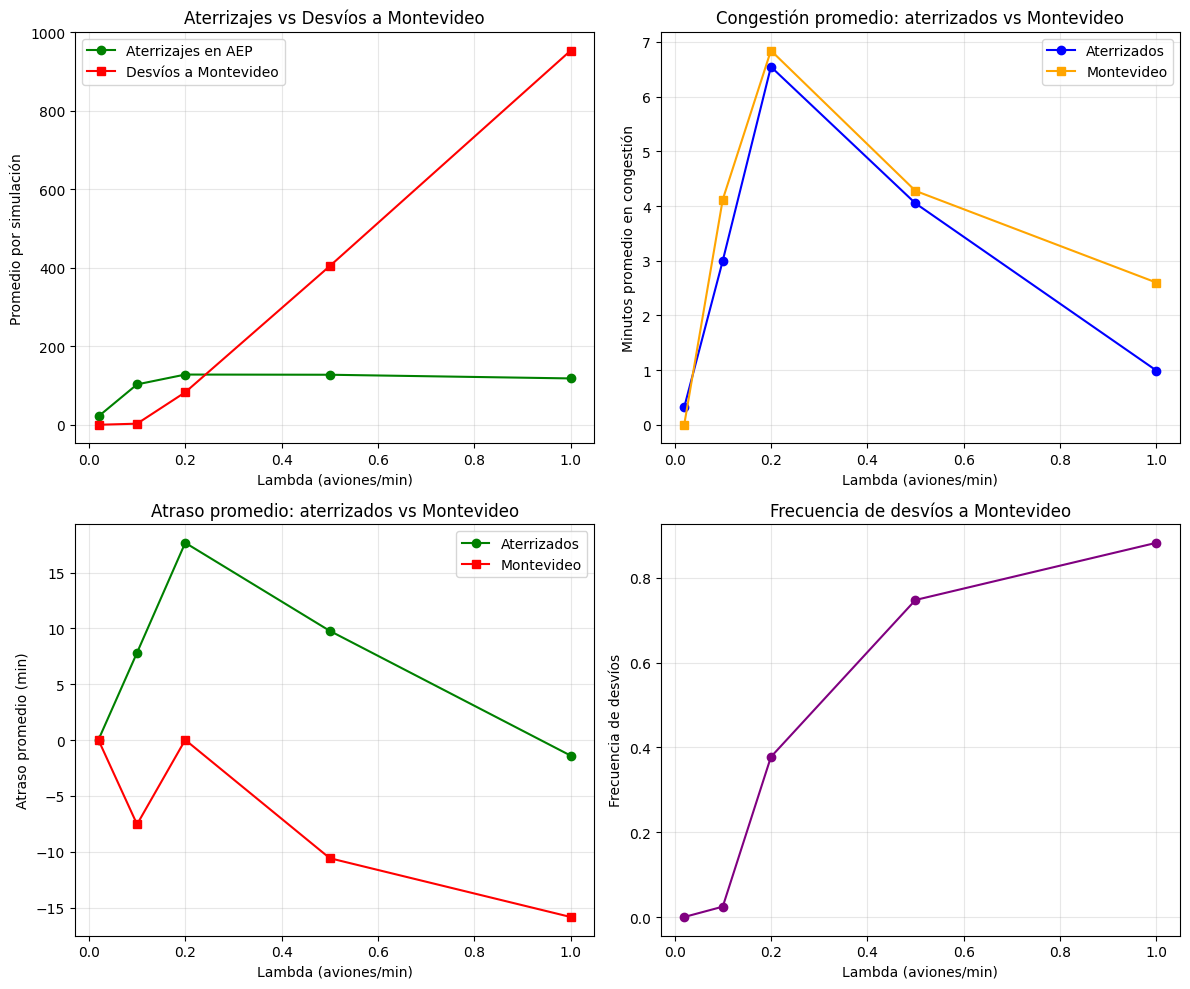

In [7]:
from graficos import plot_congestion_montevideo
plot_congestion_montevideo(df)

**¿Qué ocurre con el atraso total?**

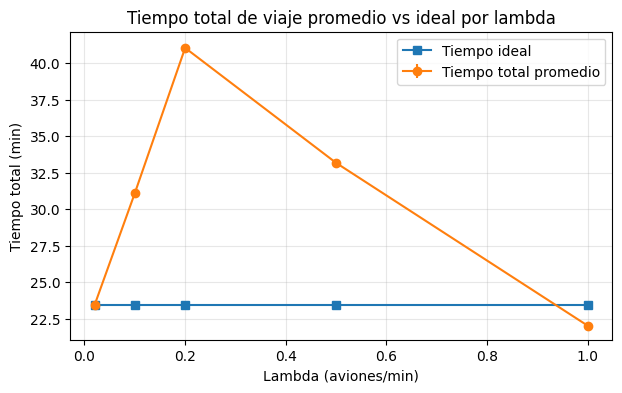

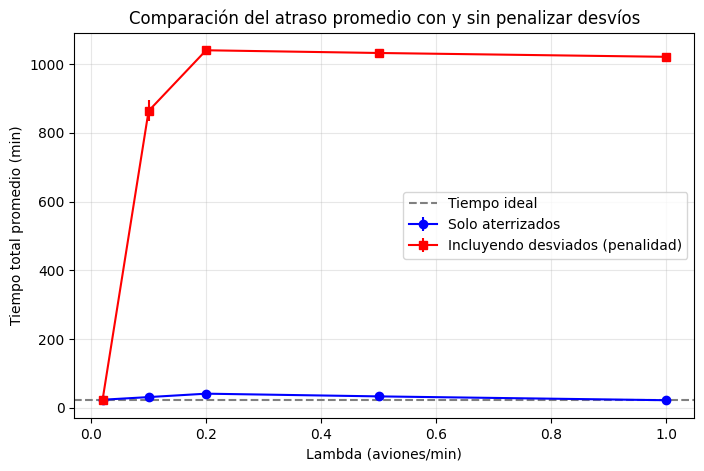

In [8]:
from graficos import plot_atraso_vs_desvios
from graficos import plot_comparacion_tiempos

plot_comparacion_tiempos(df)
plot_atraso_vs_desvios(df)

**Análisis adicional: impacto de considerar los desvíos**

En la sección anterior observamos que el **tiempo de viaje promedio** tenía un pico en 
$\lambda = 0.2$ y luego descendía para valores mayores de $\lambda$.  
Esto parecía contraintuitivo, ya que al aumentar la demanda esperaríamos más atrasos.

Para entenderlo mejor, comparamos dos métricas:

- **Solo aterrizados:** se calcula el atraso promedio únicamente sobre los aviones 
  que efectivamente lograron aterrizar en AEP.  
- **Incluyendo desviados (penalidad):** se asigna un valor de atraso muy grande 
  (prácticamente infinito) a los aviones que debieron desviarse a Montevideo.

**Resultados:**
- En la curva azul (solo aterrizados), se observa el mismo comportamiento que antes: 
  un pico en $\lambda = 0.2$ y luego valores más bajos. Esto se debe a que, en escenarios con mucha congestión, una gran cantidad de aviones son desviados y, por lo tanto, **no se incluyen en el cálculo del tiempo de viaje promedio**.
- En la curva roja (incluyendo desviados), el atraso promedio crece de manera 
  **monótona y explosiva** a medida que $\lambda$ aumenta.  
  Esto refleja mejor la realidad operativa: cuando la demanda es demasiado alta, 
  el sistema se satura y los tiempos efectivos se vuelven inviables.

La métrica de atraso depende fuertemente de si consideramos o no a los aviones desviados.  
En contextos reales de planificación, es más adecuado incorporar la penalización por 
desvío, ya que de otro modo el indicador puede dar la falsa impresión de que el sistema 
"mejora" a altos niveles de congestión.


### **Parte 5 – Día ventoso (go-arounds 10%)**

Suponemos que cada avión tiene **1/10 de probabilidad** de frustrar su aterrizaje 
(go-around) debido al viento, debiendo desviarse y buscar un nuevo hueco en la secuencia.  

Esto incrementa de manera natural la probabilidad de atraso y de congestión.

---

**Metodología**
- Valores de $\lambda$: $\{0.02, 0.1, 0.2, 0.5, 1.0\}$.  
- Duración: **18 horas (1080 minutos)** por corrida.  
- Repeticiones: **1000 simulaciones por $\lambda$**.  
- Estadísticas reportadas con **intervalos de confianza al 95%**.
- Consideramos un **intento de "aterrizaje" a cada ventana de distancia de 5 millas nauticas a AEP**. Es decir, en el rango [0,5] solo nos preguntamos UNA sola vez si hay interrupción, o no.

Métricas analizadas:
- **Atraso promedio** respecto al tiempo ideal de aproximación.  
- **Desvíos a Montevideo**.  
- **Congestión:** frecuencia y minutos en congestión por avión.  
- **Frecuencia de go-arounds**.

In [9]:
metricas_lambdas_ventoso = {lam: MetricasSimulacion() for lam in lambdas}
df_ventoso = correr_experimentos(lambdas, n_rep = 150, dia_ventoso = True, metricas_lambda = metricas_lambdas_ventoso, seed = 2025)

print_resumen(metricas_lambdas_ventoso)

Lambda     Aterrizajes  Aviones    En vuelo        Reinserciones      Desv. MVD       Desv. Viento    Desv. Tormenta 
---------------------------------------------------------------------------------------------------------
0.02       3216         3305       89              520                0               587             0              
0.1        13692        16279      798             26165              1789            5135            0              
0.2        16923        32546      1139            57296              14484           2265            0              
0.5        17746        81129      1376            80707              62007           1388            0              
1          16642        162000     1371            36000              143987          1058            0              


- **En vuelo:** El número de aviones que quedan en vuelo al final de la simulación aumenta con λ, reflejando congestión y acumulación en el espacio aéreo.
- **Reinserciones:** Crecen fuertemente con λ, indicando que muchos aviones deben esperar o realizar maniobras para mantener la separación mínima.
- **Desvíos por viento (Desv. Viento):** Se mantienen relativamente estables en todos los escenarios, lo que indica que el efecto del viento es constante y no depende de la congestión.


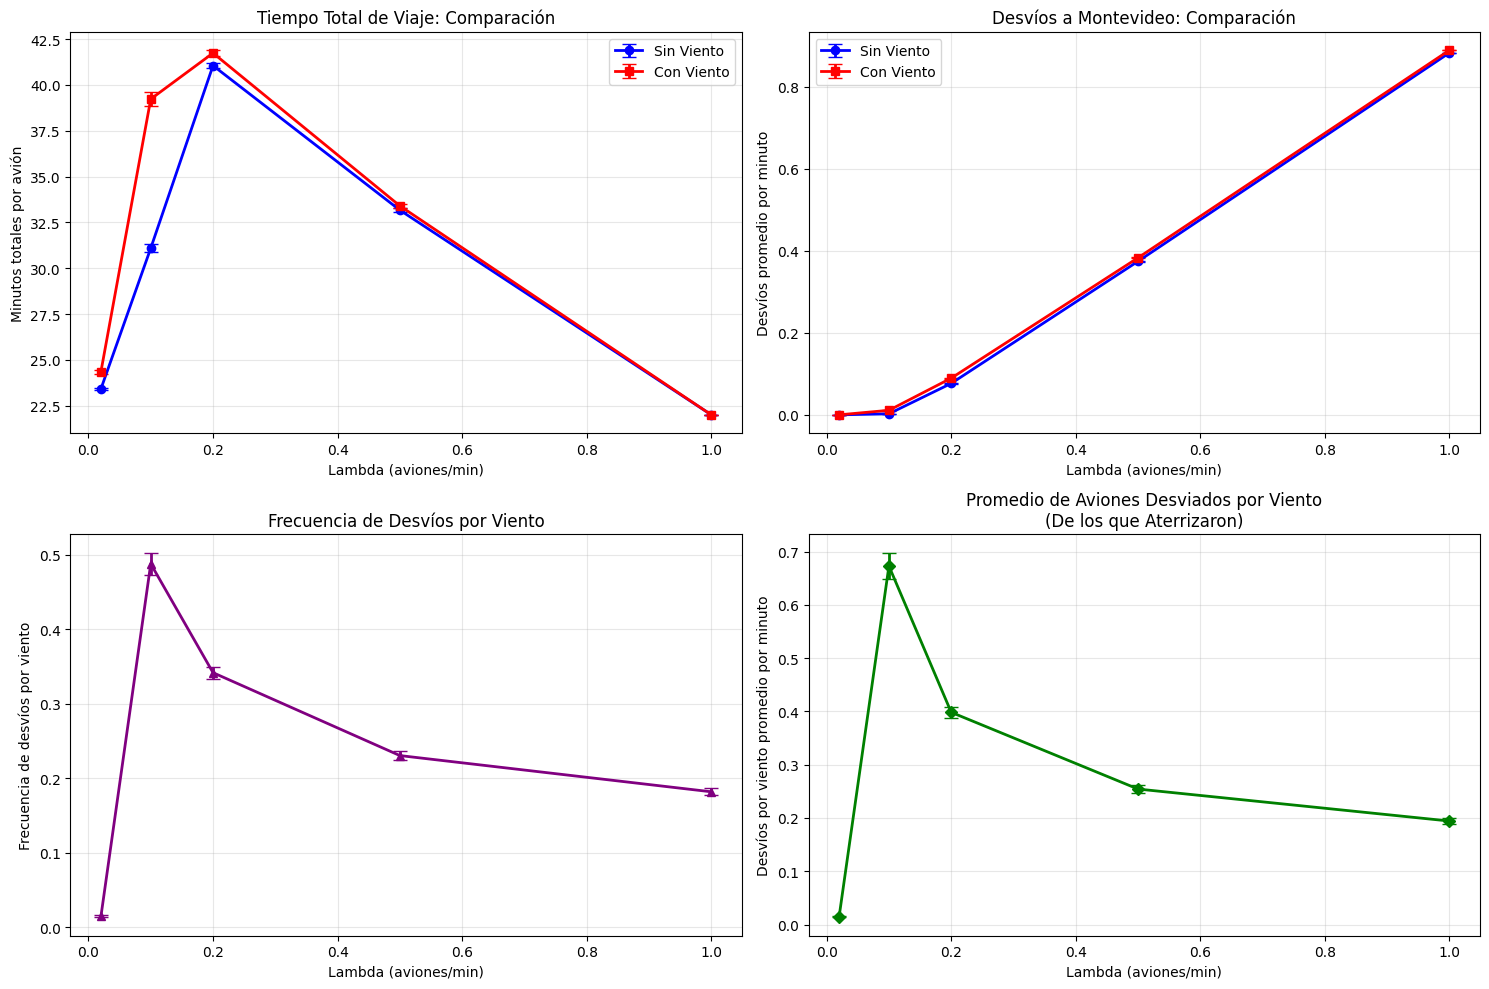

In [10]:
from graficos import plot_analisis_completo
plot_analisis_completo(df, df_ventoso)


La **frecuencia de go-arounds** es mayor al 10% esperado para $\lambda$ bajos, 
  pero se amplifica en escenarios congestionados donde los intentos fallidos 
  repercuten sobre la fila completa.

In [11]:
from simulacion import simular_con_historia
from graficos import animar_con_desvios
from IPython.display import HTML

# Simulación ejemplo: día ventoso con λ=0.2
sim_data_viento = simular_con_historia(lambda_por_min=0.2, minutos=200, seed=123, dia_ventoso=True)

# Animación con desvíos CAMBIAR
#anim_desvios = animar_con_desvios(sim_data_viento["historia"], minutos=200, tail=25)
#HTML(anim_desvios.to_jshtml())

### **Parte 6 – Tormenta con cierre de AEP**

Simulamos un evento extremo: cierre inesperado del aeropuerto durante **30 minutos**.  
Durante ese período ningún avión puede aterrizar, acumulándose una cola de espera que 
genera atrasos y desvíos a Montevideo.

Lambda     Aterrizajes  Aviones    En vuelo        Reinserciones      Desv. MVD       Desv. Viento    Desv. Tormenta 
---------------------------------------------------------------------------------------------------------
0.02       3211         3302       91              528                0               561             164            
0.1        13459        16265      818             27280              1988            4906            592            
0.2        16513        32590      1147            57752              14930           2101            570            
0.5        17214        81191      1385            80758              62592           1374            549            
1          16214        162000     1380            36000              144406          1036            450            


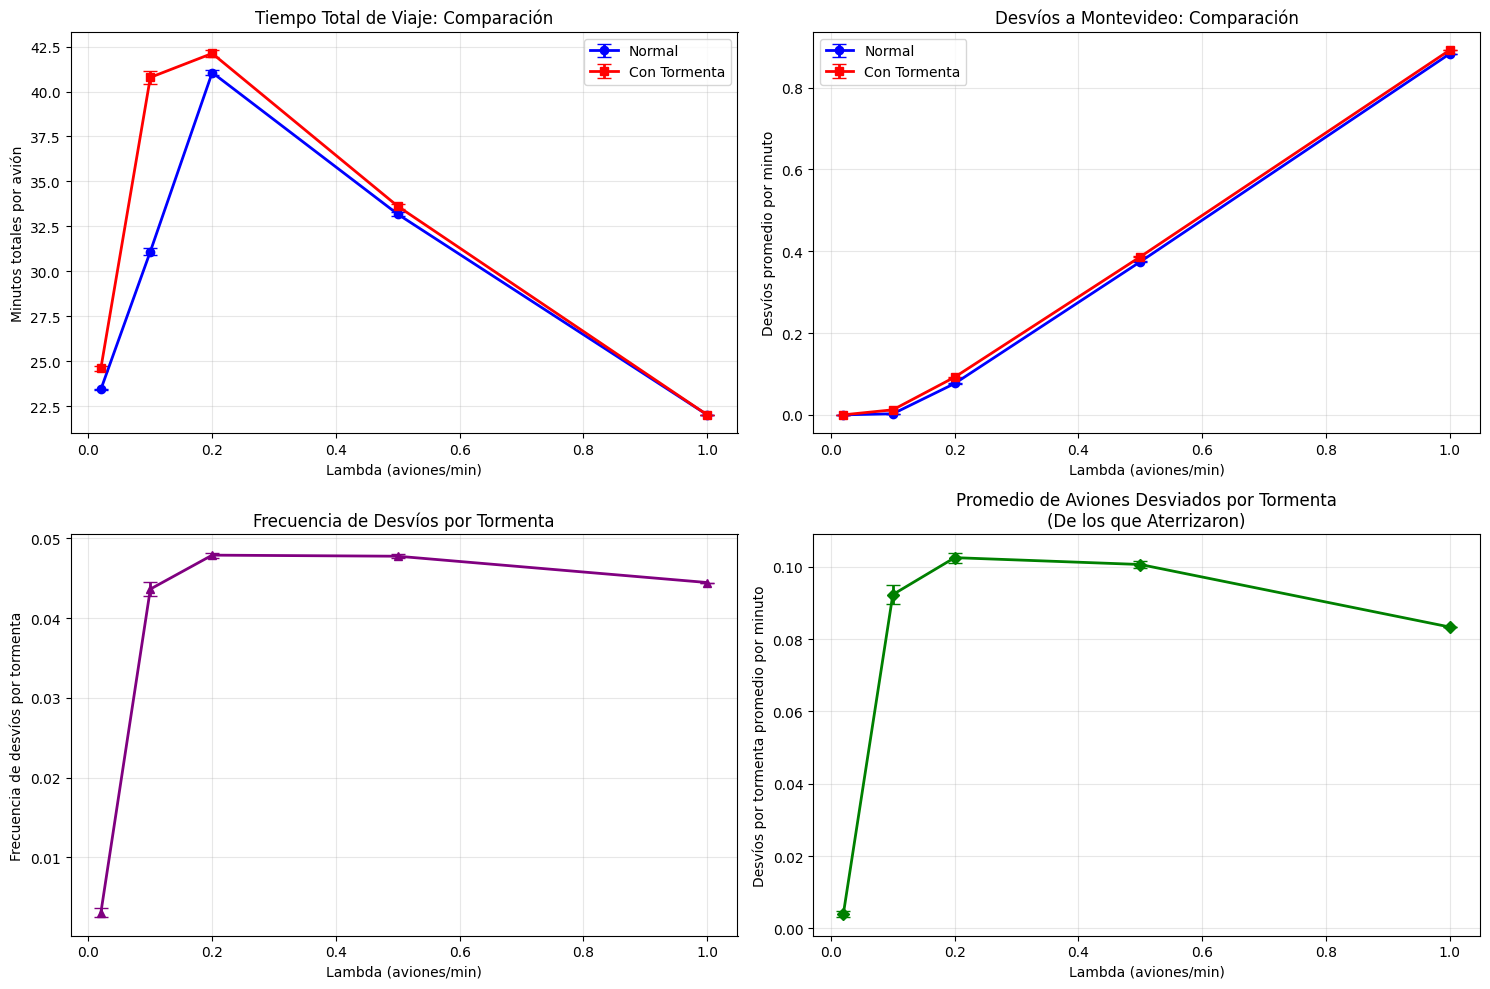

In [12]:
from graficos import plot_analisis_completo_tormenta
metricas_lambdas_tormenta = {lam: MetricasSimulacion() for lam in lambdas}

df_tormenta = correr_experimentos(lambdas, n_rep = 150, metricas_lambda = metricas_lambdas_tormenta, hay_tormenta = True, dia_ventoso= True, seed = 2027)
print_resumen(metricas_lambdas_tormenta)

plot_analisis_completo_tormenta(df, df_tormenta)

Cuando la demanda (λ) es alta, el sistema ya está saturado y la mayoría de los desvíos ocurren por congestión y viento antes de que los aviones lleguen a la etapa donde la tormenta los podría afectar.
En otras palabras, muchos aviones ya fueron desviados por otros motivos y no llegan a enfrentar la tormenta, por lo que el impacto relativo de la tormenta disminuye a medida que λ aumenta.

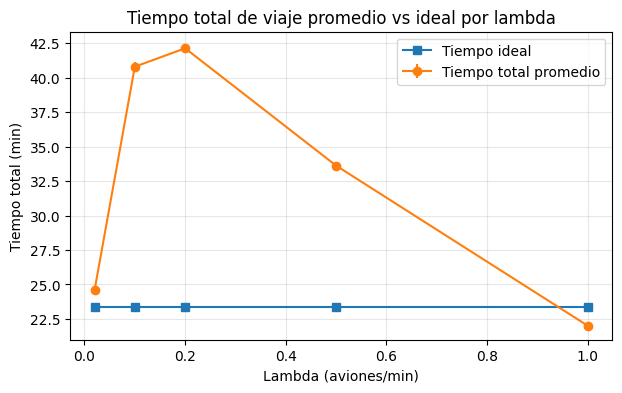

In [13]:
plot_comparacion_tiempos(df_tormenta)

En cuanto al **tiempo total de viaje**, la simulación muestra que la tormenta de 30 minutos no genera un cambio abrupto en la métrica global. Esto ocurre porque, en escenarios de alta demanda (λ alto), la mayoría de los aviones ya son desviados por congestión o viento antes de que puedan verse afectados por la tormenta. Por lo tanto, el impacto de la tormenta sobre el tiempo total de viaje promedio se diluye y no se observa una diferencia significativa respecto al escenario sin tormenta.

#### **Parte 7: Posibles mejoras**

Proponemos una política que consiste en un control de flujo por reducción escalonada de velocidad cuyo objetivo es disminuir los desvíos a Montevideo, aun a costa de generar un mayor atraso promedio.

La lógica se basa en la información contemporánea del sistema: en cada instante t se mide la congestión actual (cantidad de aviones que vuelan por debajo de su máxima velocidad permitida). Según este valor y su persistencia en el tiempo, el sistema decide si aplicar o no una reducción en la velocidad máxima disponible para los aviones en la fila, evitando aplicar la política cuando no es necesario (por ejemplo, cuando lambda es muy bajo y no hay desvíos).

La reducción se implementa de manera escalonada: los primeros aviones en la cola mantienen un techo de velocidad más cercano a su 
v_max, mientras que los que se encuentran más atrás deben volar a un techo progresivamente menor, hasta un paso límite 
i_max . De esta forma, se "estira" la fila y se reduce la probabilidad de que los aviones se vean forzados a desviarse a Montevideo por falta de huecos de reinserción. 

Para evitar oscilaciones excesivas (encendido y apagado constante de la política), se introduce un mecanismo para verificar que la congestión dura en el tiempo:

-Si la congestión supera ciertos umbrales durante al menos dos minutos consecutivos, la política se activa en modo suave o fuerte.

-Si la congestión cae por debajo de un umbral bajo durante tres minutos seguidos, la política se desactiva.

Buscamos suavizar la dinámica de la cola limitando preventivamente la velocidad de algunos aviones, con el fin de lograr un mayor número de aterrizajes y menos desvíos, aun cuando ello implique un aumento controlado en el atraso promedio.

*Para saber qué umbrales aplicar calculamos:*

| λ (av/min) | λ × 23.4 | ≈ aviones simultáneos         |
|------------|----------|-------------------------------|
| 0.02       | 0.468    | 0.47                         |
| 0.10       | 2.34     | 2.34                         |
| 0.20       | 4.68     | 4.68                         |
| 0.50       | 11.70    | 11.7                         |
| 1.00       | 23.40    | 23.4                         |

A partir de estos valores aproximamos cuántos aviones pueden encontrarse en simultáneo en la fila para cada intensidad de arribo λ.  
Con esta referencia, definimos los *umbrales de congestión* que determinan la activación o desactivación de la política de control de flujo:

- *3 aviones congestionados:* activar política en modo fuerte (si perdura por más de 2 minutos).
- *2 aviones congestionados:* activar política en modo suave (si perdura por más de 2 minutos).
- *Menos de 2 aviones congestionados:* desactivar política (si perdura por más de 3 minutos).

De esta forma, la política se ajusta en función de la escala realista de congestión esperada según la tasa de arribos.

Lambda     Aterrizajes  Aviones    En vuelo        Reinserciones      Desv. MVD       Desv. Viento    Desv. Tormenta 
---------------------------------------------------------------------------------------------------------
0.02       3211         3303       92              529                0               556             177            
0.1        13579        16263      881             22043              1803            4963            593            
0.2        17587        32647      1105            35879              13955           2239            619            
0.5        19036        81130      1329            33349              60765           1472            648            
1          23622        162000     1261            27150              137117          2028            750            


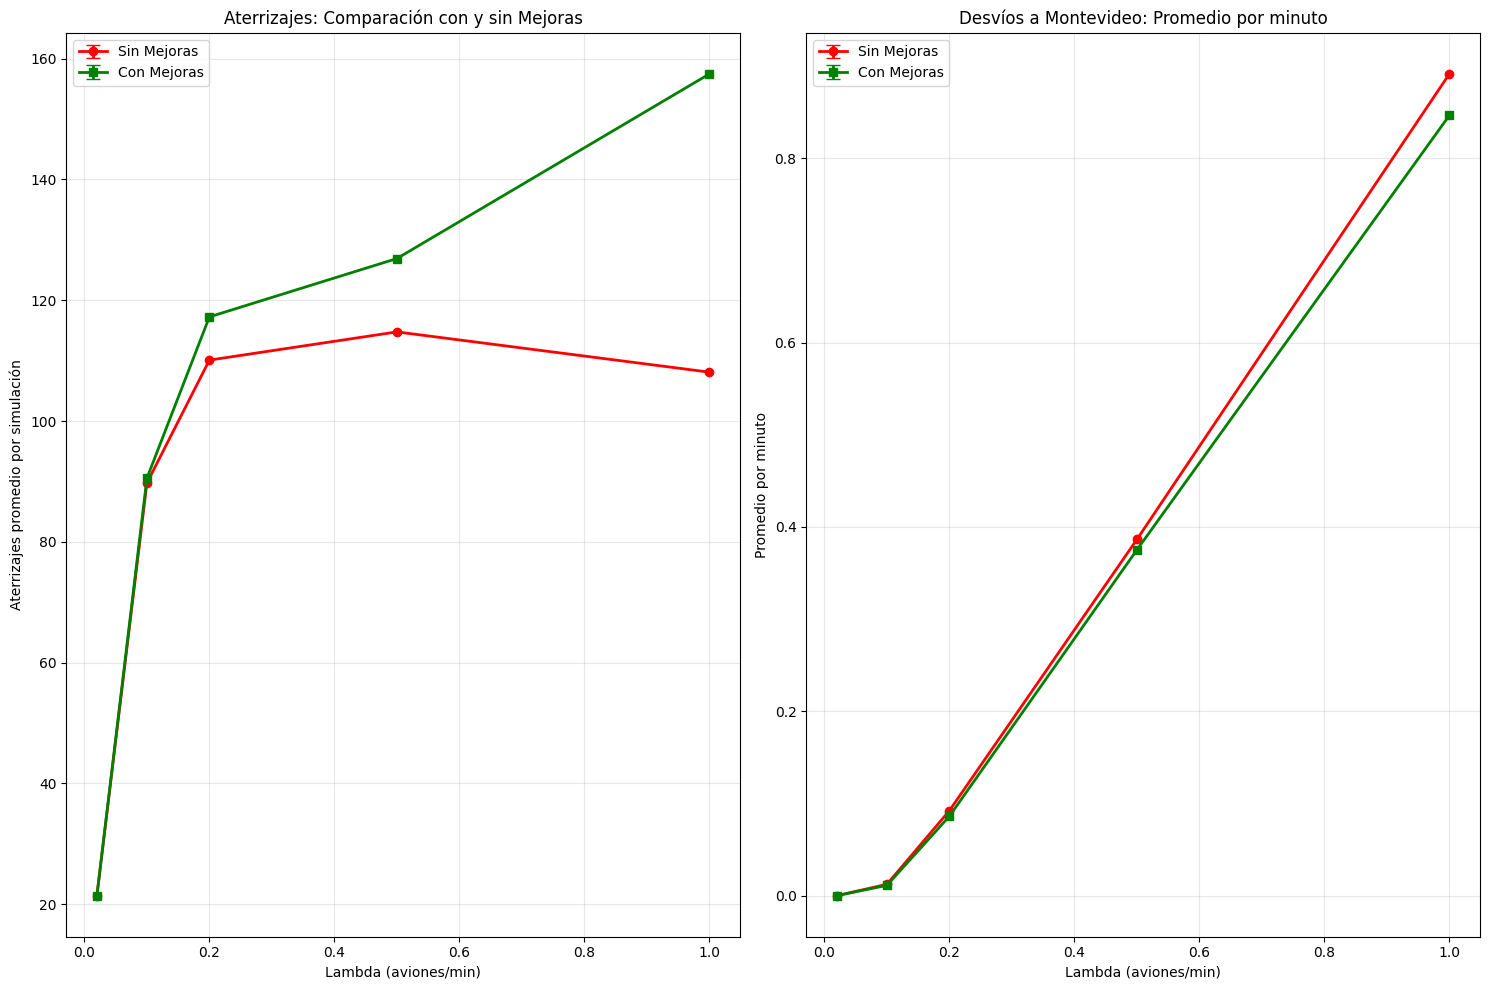

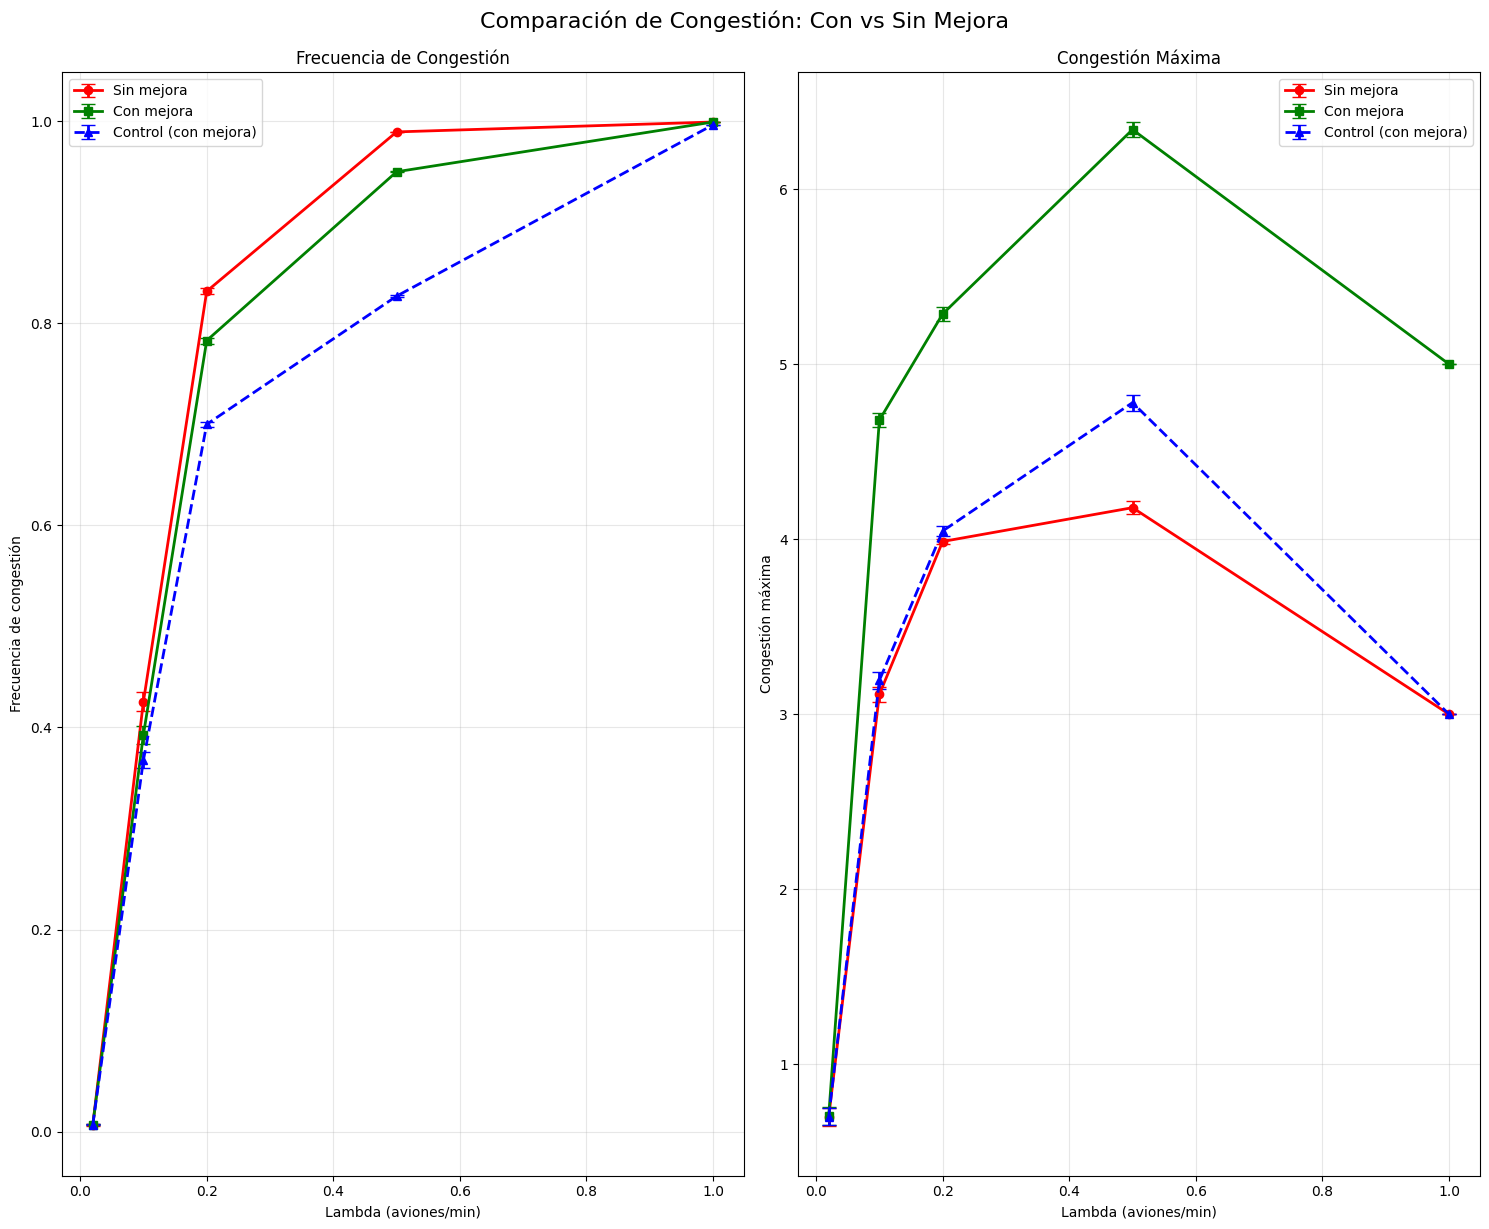

In [14]:
from graficos import plot_comparacion_mejoras, comparar_congestion

metricas_lambdas_mejoradas = {lam: MetricasSimulacion() for lam in lambdas}

df_mejorado= correr_experimentos(lambdas, n_rep = 150,metricas_lambda = metricas_lambdas_mejoradas, hay_tormenta = True, dia_ventoso= True, seed = 2027, mejora = True)
print_resumen(metricas_lambdas_mejoradas)

plot_comparacion_mejoras(df_tormenta, df_mejorado)
comparar_congestion(df_tormenta, df_mejorado)


### **Parte extra: BONUS**

#### **Aparición de aviones de cualquier dirección**

---

**Metodología: Organización del Tráfico Aéreo con Fixes y Slots Objetivo**

El objetivo es ordenar y secuenciar aviones que llegan desde cualquier dirección hacia un aeropuerto con una sola pista, evitando conflictos y garantizando la separación mínima de seguridad (4 minutos entre aviones en final).

- **Problema Inicial**

En el modelo base, todos los aviones aparecen a 100 millas náuticas (mn) y entran directamente a la fila de aproximación final.
Esto genera dos problemas principales:

- Cruces peligrosos: los aviones llegan desde distintos ángulos y pueden chocar o interferir entre sí.

- Desorden en la fila: si dos aviones llegan casi al mismo tiempo, no hay un mecanismo claro para decidir quién pasa primero.

- **Solución Propuesta**

Para evitar estos problemas, se introduce un sistema inspirado en la operación real de aeropuertos: **Fixes**

Son puntos fijos en el aire, ubicados a unas 25 mn del aeropuerto.Funcionan como “sala de espera” y lugar donde ordenar a los aviones. En este modelo hay cuatro fixes, uno en cada punto cardinal: Norte (N), Sur (S), Este (E), Oeste (O). Cada avión que aparece a 100 mn se dirige primero al fix más cercano según su posición inicial.

- Holding (patrón de espera): Cuando un avión llega a su fix y no puede seguir directo hacia la pista, se mantiene volando en círculos estandarizados sobre ese punto. Cada vuelta en el holding dura 4 minutos, que en la simulación se modela como “bloques” de tiempo de espera. Esto crea una cola virtual FIFO (First In, First Out): el primero en llegar al fix será el primero en salir cuando haya espacio.

- Merge Point (punto de fusión): Está ubicado a 15 mn de la pista. Todas las rutas desde los fixes convergen en este punto, formando una sola fila final hacia la pista. Desde este punto en adelante, todos los aviones están perfectamente alineados y solo queda regular su velocidad.

- Slots temporales: Para evitar que dos aviones salgan de fixes opuestos al mismo tiempo y se crucen, se asignan slots de tiempo. Solo un avión puede entrar al merge cada 5 minutos. Esto asegura que cuando llegue a la final haya ≥ 4 minutos de separación.

**Flujo Operativo Paso a Paso**

- 1 Aparición: El avión aparece en el radar a 100 mn en cualquier dirección. Se le asigna el fix más cercano.

- 2 Tramo hacia el fix: Vuela directo a su fix usando la velocidad indicada por el rango operativo.

- 3 Llegada al fix: Si el merge está libre, puede continuar directo. Si no hay lugar, entra en holding: Una vuelta = 4 minutos de espera. Cada avión espera su turno en orden de llegada.

- 4 Asignación de slot: El sistema calcula el siguiente slot disponible (múltiplo de 5 minutos). El avión sale del fix exactamente a la hora necesaria para llegar justo a su slot.

- 5 Fusión y final: Desde el merge hacia la pista, todos los aviones vuelan en línea recta y alineados. Se mantiene separación mínima ajustando velocidades. Si por algún motivo la separación se reduce demasiado, se fuerza una vuelta extra en holding.

**Reglas de Coordinación entre Fixes**

El despacho desde los fixes se hace en orden round-robin:

Norte → Este → Sur → Oeste → Norte → ...


Si un fix no tiene aviones, se pasa al siguiente. Esto garantiza que no salgan dos aviones a la vez desde direcciones opuestas.

**Beneficios de Esta Metodología**

- Seguridad: se evitan cruces peligrosos y conflictos en la aproximación final.

- Orden: la cola final llega perfectamente secuenciada a la pista.

- Realismo: este método refleja cómo los aeropuertos reales gestionan el tráfico aéreo (fixes, holdings, metering).

- Flexibilidad: permite manejar escenarios de congestión, mal clima y cierres temporales de pista.

In [15]:
#COMPLETAR

### **Otras dimensiones del problema** - Aviones con prioridad

---

En esta extensión, incorporamos un subconjunto de **aviones que tienen prioridad alta**, simulando situaciones como emergencias médicas, poco combustible o fallas técnicas. Estos aviones deben ser atendidos primero, lo que puede afectar la secuencia de aterrizajes, generar mayores atrasos en vuelos regulares y aumentar la probabilidad de desvíos a Montevideo.

**Idea General:**

- Un porcentaje fijo de aviones ($p_{urgencia}$) son "aviones prioritarios". *Ejemplo: 5%.* (prioridad = 1 si el avión es prioritario, 0 en caso contrario.)

- Un avión prioritario puede:
    - Pasar al frente de la fila si hay congestión.
    - Reducir la separación mínima de seguridad a 3 minutos (versus los 5 normales) solo para ellos.

- Los aviones normales deben ajustarse y disminuir velocidad para respetar la prioridad. Si no hay espacio suficiente, un avión normal puede ser desviado a hacer fila nuevamente, o eventualmente irse a Montevideo para dejar lugar al avión prioritario.

In [16]:
from analisis import MetricasSimulacion

lambdas = [0.02, 0.1, 0.2, 0.5, 1]

# Experimentos con 5% de prioritarios
metricas_lambdas_prio = {lam: MetricasSimulacion() for lam in lambdas}
df_prio = correr_experimentos(lambdas, n_rep = 150, minutos = 1080, p_prioritario = 0.1, seed = 2025, dia_ventoso = True, hay_tormenta = False, metricas_lambda = metricas_lambdas_prio)
print_resumen(metricas_lambdas_prio)

Lambda     Aterrizajes  Aviones    En vuelo        Reinserciones      Desv. MVD       Desv. Viento    Desv. Tormenta 
---------------------------------------------------------------------------------------------------------
0.02       3250         3316       64              773                2               564             0              
0.1        13377        16270      797             29847              2096            4537            0              
0.2        17183        32505      1072            55749              14250           2255            0              
0.5        20412        81085      1379            68830              59294           1777            0              
1          24669        162000     1644            41972              135687          1836            0              


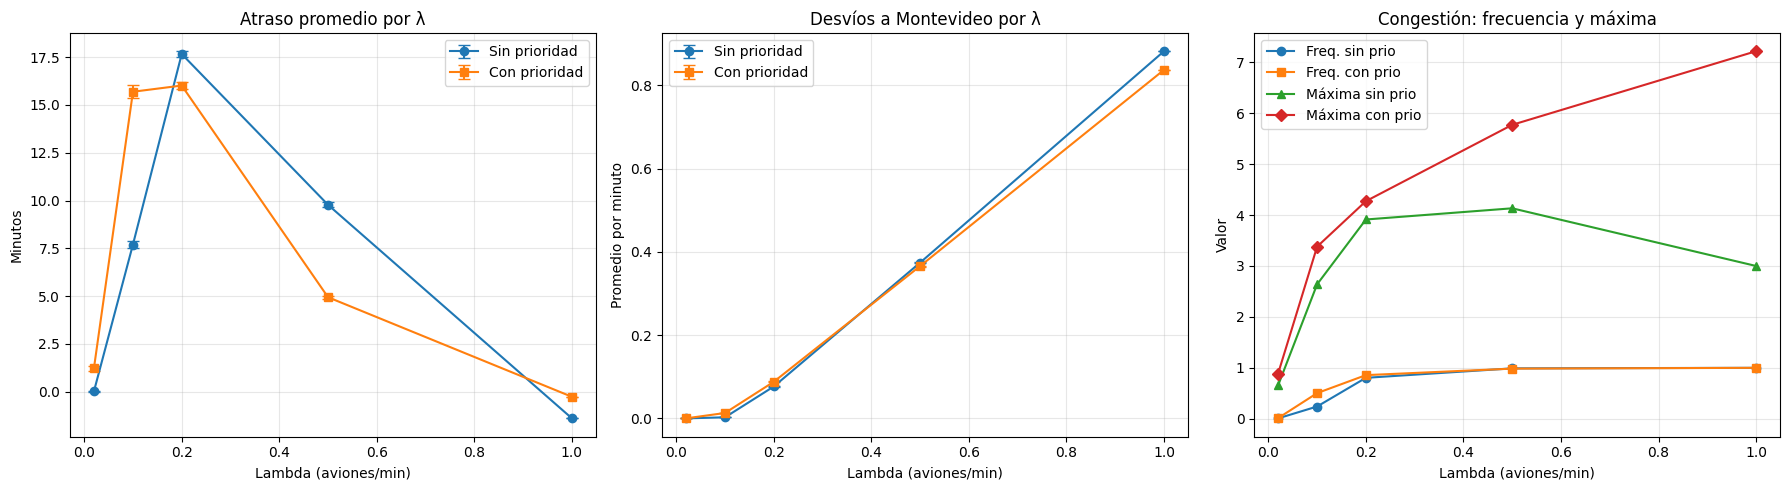

In [17]:
# Visualizaciones globales
from graficos import plot_prioritarios_vs_normales
plot_prioritarios_vs_normales(df, df_prio)

Para niveles bajos de demanda ($\lambda = 0.02$), el sistema opera sin problemas:
prácticamente no existen desvíos ni congestión, y los atrasos son mínimos.

A medida que $\lambda$ aumenta, el sistema se aproxima a su límite de capacidad.
El punto crítico se encuentra entre $\lambda = 0.2$ y $\lambda = 0.5$, donde comienzan a producirse desvíos masivos y reinserciones frecuentes.

En escenarios de muy alta congestión ($\lambda = 1.0$), la capacidad del aeropuerto se ve totalmente desbordada:
la mayoría de los aviones no logra aterrizar, generando un gran número de desvíos a Montevideo.

La implementación de vuelos prioritarios logra mejorar los tiempos de arribo para estos vuelos, pero incrementa la congestión global y el atraso de los vuelos no prioritarios.

Bajo altos niveles de demanda, la estrategia de priorización requiere medidas adicionales, como:

- Corredores exclusivos para vuelos prioritarios.

- Ajustes dinámicos en la separación mínima.

Esto permitiría evitar que la operación global del aeropuerto se deteriore. Esta extensión del modelo refleja el compromiso entre eficiencia, equidad y seguridad en la gestión de tráfico aéreo.